In [ ]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Pratikum"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Pratikum

/content/drive/My Drive/Pratikum


In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls

kaggle.json


In [ ]:
!kaggle datasets download -d vbookshelf/rice-leaf-diseases

100% 36.7M/36.7M [00:00<00:00, 26.1MB/s]



In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rice-leaf-diseases.zip


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
!ls

kaggle.json  rice_leaf_diseases


In [ ]:
!mkdir dataset

In [ ]:
!ls

dataset  kaggle.json  rice_leaf_diseases


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders


base_dir = '/content/drive/MyDrive/Pratikum/rice_leaf_diseases'
data_dir = '/content/drive/My Drive/Pratikum/dataset'

splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8, .19, .01),group_prefix=None)

Copying files: 120 files [00:02, 50.75 files/s]


In [ ]:
# TULIS KODE ANDA DISINI
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
input_shape = (224, 224)

train = '/content/drive/MyDrive/Pratikum/dataset/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

validation = '/content/drive/MyDrive/Pratikum/dataset/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

test = '/content/drive/MyDrive/Pratikum/dataset/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 96 images belonging to 3 classes.
Found 21 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, GlobalMaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [ ]:
# Model building
#Instatiating A convnet

model = Sequential()

model.add(InputLayer(input_shape=[224, 224, 3]))
model.add(Conv2D(filters=1, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))


model.add(Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))

model.add(Conv2D(filters=1, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))
model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(1024,activation="softmax"))
model.add(Dense(512,activation="softmax"))
model.add(Dense(3, activation="softmax"))

In [ ]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(32, (3,3), activation="relu"))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(64, (3,3), activation="relu"))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(128,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(3, activation="softmax"))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 1)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 3)       30        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 3)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 1)         28        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 1)        0

In [ ]:
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit_generator(train_generator, epochs = 100, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
3/3 [==============================] - 43s 6s/step - loss: 1.1018 - acc: 0.2500 - val_loss: 1.0990 - val_acc: 0.3333
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: 1.0992 - acc: 0.3021 - val_loss: 1.0989 - val_acc: 0.3333
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 1.0990 - acc: 0.2917 - val_loss: 1.0987 - val_acc: 0.3333
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 1.1000 - acc: 0.3333 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 1.0990 - acc: 0.3021 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 1.0992 - acc: 0.3333 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 1.0989 - acc: 0.2917 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 1.0992 - acc: 0.3333 - val_loss: 

In [ ]:
H2 = model2.fit_generator(train_generator, epochs = 100, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
3/3 [==============================] - 6s 2s/step - loss: 1.1032 - acc: 0.3333 - val_loss: 1.0992 - val_acc: 0.3810
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: 1.0839 - acc: 0.3750 - val_loss: 1.0978 - val_acc: 0.3333
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 1.0972 - acc: 0.3646 - val_loss: 1.0981 - val_acc: 0.3333
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 1.0835 - acc: 0.4167 - val_loss: 1.0978 - val_acc: 0.3333
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 1.0746 - acc: 0.4896 - val_loss: 1.0972 - val_acc: 0.3810
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 1.0845 - acc: 0.3958 - val_loss: 1.0983 - val_acc: 0.3810
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 1.0733 - acc: 0.4896 - val_loss: 1.0997 - val_acc: 0.3810
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 1.0620 - acc: 0.5208 - val_loss: 1

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model2.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


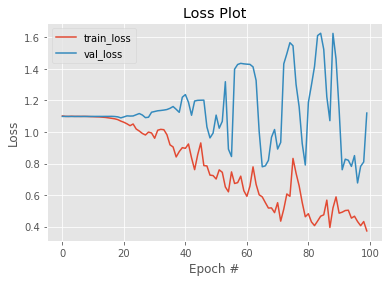

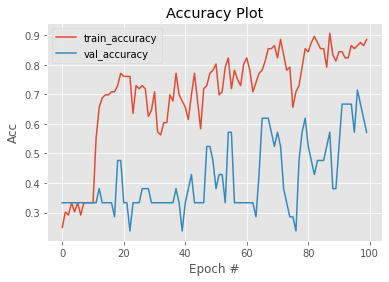

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig =plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Los.svg'

plt.style.use("ggplot")
fig2=plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_accuracy")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Accuracy.svg'

fig2.savefig(image_name, format=image_format, dpi=1200)

fig.savefig(image_name, format=image_format, dpi=1200)

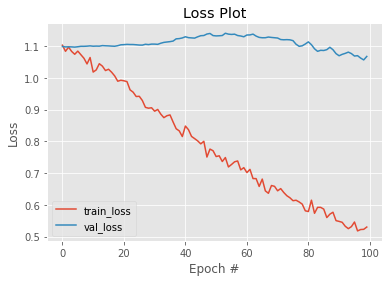

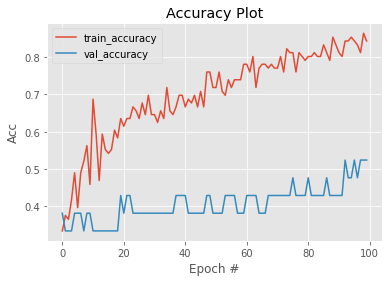

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig3 =plt.figure()
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Los.svg'

plt.style.use("ggplot")
fig4=plt.figure()
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_accuracy")
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Accuracy.svg'

fig3.savefig(image_name, format=image_format, dpi=1200)

fig4.savefig(image_name, format=image_format, dpi=1200)